In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from image_extractor import preprocess_hsv, seperate_chanel, statistic_analysis, init_lut, linear_fn, curved
from skimage.feature import graycomatrix,graycoprops
# plt.rcParams['figure.dpi'] = 102.46
plt.rcParams["figure.figsize"] = (6,6)
lut1 = init_lut(fn=linear_fn, coefficient=15)
lut2 = init_lut(fn=curved, coefficient=1.5)

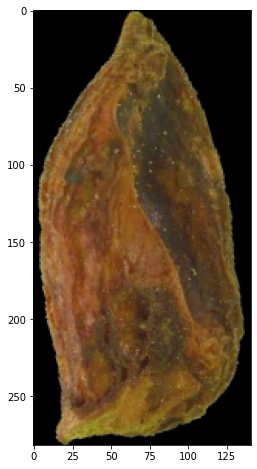

In [188]:
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (2).JPG'
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Brittle/image (87).JPG'
image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Flattened/image (42).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (10).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (100).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_White/image (23).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_White/image (72).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Slaty/image (11).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Slaty/image (56).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Brown/image (3).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Moldered/image (7).JPG'



image = cv2.imread(image_dir)
image_hsv , cnt, ell= preprocess_hsv(image, lut1, lut2)
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(image_rgb)
plt.show()
h,s,val = cv2.split(image_hsv)

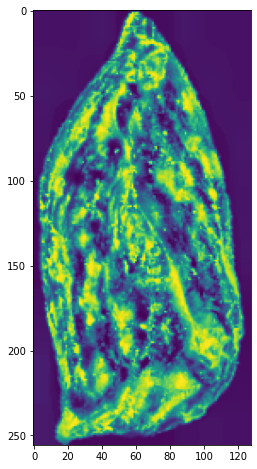

In [195]:
clahe_op = cv2.createCLAHE(4, (8,8))
val = clahe_op.apply(val)
val = cv2.resize(val, (128,256))

plt.imshow(val)
plt.show()



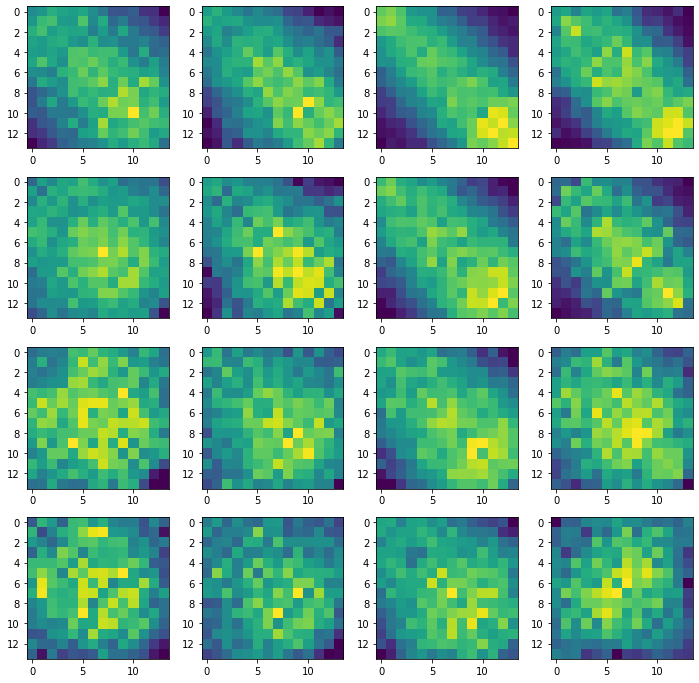

In [201]:
plt.rcParams["figure.figsize"] = (12,12)
level = 16
bins = np.linspace(0, 256, level+1)
digitize = np.digitize(val, bins) - 1
glcm = graycomatrix(digitize, [5,7,9,11], [0, np.pi/4, np.pi/2, 3*np.pi/4], level, True, False)
glcm = glcm[2:level+1,2:level+1]
# print(glcm[:,:,0,0])
for i in range(4):
    for j in range(4):
        # mat = glcm[1:level,1:level,i,j]
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(glcm[:,:,i,j])

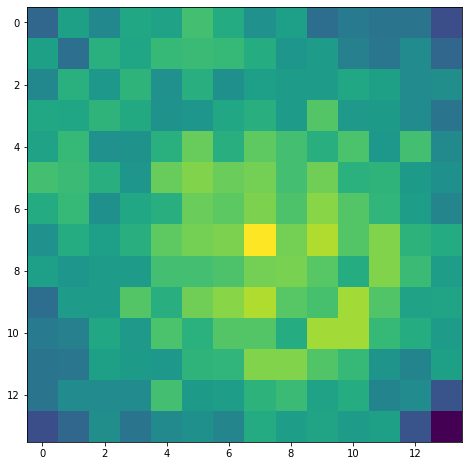

In [202]:
plt.rcParams["figure.figsize"] = (8,8)
cm = glcm[:,:,1,0]
plt.imshow(cm)

In [203]:
np.shape(cm)

(14, 14)

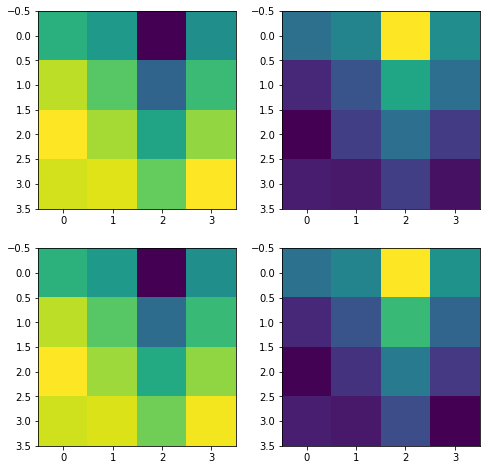

[[4.11763404 3.99320362 3.32296499 3.94044488]
 [4.43464333 4.23758826 3.7584855  4.15822714]
 [4.55981622 4.37715135 4.0768432  4.35668754]
 [4.4726766  4.49243279 4.29320885 4.53858814]]


In [204]:
plt.rcParams["figure.figsize"] = (8,8)

glcm_cons = graycoprops(glcm, 'contrast')
glcm_dissimilarity = graycoprops(glcm, 'dissimilarity')
glcm_energy = graycoprops(glcm, 'ASM')
glcm_correlation = graycoprops(glcm, 'correlation')
glcm_homogeneity = graycoprops(glcm, 'homogeneity')

plt.subplot(2,2,1)
plt.imshow(glcm_cons)
plt.subplot(2,2,2)
plt.imshow(glcm_homogeneity)
plt.subplot(2,2,3)
plt.imshow(glcm_dissimilarity)
plt.subplot(2,2,4)
plt.imshow(glcm_correlation)
plt.show()

print(glcm_dissimilarity)

In [205]:
glcm_correlation

array([[ 0.13467838,  0.16670145,  0.39793393,  0.19164275],
       [ 0.02420893,  0.08569173,  0.25946754,  0.11359676],
       [-0.02142499,  0.03721953,  0.14808363,  0.04574775],
       [ 0.01108319,  0.00484629,  0.07505399, -0.02464635]])